# Differential Splicing
Based on the alternative splicing events, Isotools facilitates comparisons of samples and groups of samples. 


In this tutorial, we will apply the statistical test to find differential splicing between K562 and GM12878 (on chromosome 8), and how to interpret and depict the results. 

To run this tutorial, download the transcriptome object file 'PacBio_isotools_substantial_isotools.pkl' from [here](https://oc-molgen.gnz.mpg.de/owncloud/s/gjG9EPiQwpRAyg3) to a subfolder 'demonstration_dataset'.

In [1]:
from isotools import Transcriptome
import matplotlib.pyplot as plt
import pandas as pd

path='demonstration_dataset'
isoseq=Transcriptome.load(f'{path}/PacBio_isotools_substantial_isotools.pkl')



This is isotools version 0.3.2rc6, but data has been pickled with version 0.3.2rc2, which may be incompatible


## Statistical test for differential splicing
![Slide](isotools_diffsplice.png)

To run the test, we need to define the groups to compare, what types of splicing events are of interest, and the coverage threshold (over all samples) required to test an event. 
The resulting table contains the test statistics, including a description of the tested region, p-value, the transcript ids supporting outcome A or B of the event, group wise PSI and overdispersion values as well as sample wise coverage information.


In [2]:
#perform the test:
types_of_interest=['ES','ME','5AS','3AS','IR'] #ignore alternative TSS/PAS for now

diff_splice=isoseq.altsplice_test(isoseq.groups(), types=types_of_interest, min_total=200).sort_values('pvalue').reset_index(drop=True)

sig=diff_splice.padj<.1
print(f'{sum(sig)} differential splice sites in {len(diff_splice.loc[sig,"gene"].unique())} genes for {" vs ".join(isoseq.groups())}')
pd.set_option('display.max_columns', None)
diff_splice.head(18)
diff_splice.to_csv(f'{path}/demonstration_dataset_differential_events.csv',index = False)

100%|██████████| 10803/10803 [00:10<00:00, 1076.70genes/s]


18 differential splice sites in 16 genes for GM12878 vs K562


In [3]:
diff_splice

,gene,gene_id,chrom,strand,start,end,splice_type,novel,padj,pvalue,trA,trB,nmdA,nmdB,GM12878_PSI,GM12878_disp,K562_PSI,K562_disp,total_PSI,total_disp,GM12878_a_GM12878_in_cov,GM12878_a_GM12878_total_cov,GM12878_b_GM12878_in_cov,GM12878_b_GM12878_total_cov,GM12878_c_GM12878_in_cov,GM12878_c_GM12878_total_cov,K562_a_K562_in_cov,K562_a_K562_total_cov,K562_b_K562_in_cov,K562_b_K562_total_cov,K562_c_K562_in_cov,K562_c_K562_total_cov
0,RIPK2,ENSG00000104312.8,chr8,+,89780160,89786592,ES,True,0.000177,0.000001,"[16, 8, 26, 34, 41, 46, 32, 36, 39, 40, 42, 47...","[2, 0, 12, 9, 13, 4, 5, 10, 11, 14, 15, 17, 18...",0.000000,0.001595,0.994244,8.728420e-08,0.296339,1.059189e-05,0.719659,0.103622,76,76,218,220,224,225,34,104,41,153,34,111
1,ASAH1,ENSG00000104763.20,chr8,-,18067104,18067133,IR,True,0.007126,0.000135,"[11, 13, 80, 99, 69, 70, 101, 79, 81, 83, 88, ...","[12, 14, 68, 42, 44]",0.003788,0.000000,0.512441,1.078330e-03,0.010335,3.306517e-07,0.231512,0.069018,13,31,23,35,39,81,0,51,1,81,1,62
2,RECQL4,ENSG00000160957.15,chr8,-,144511789,144511910,5AS,False,0.007126,0.000145,"[22, 31, 6, 20, 11, 72, 13, 33, 8, 79, 2, 105,...","[114, 147, 124, 38, 143, 205, 123, 152, 197, 1...",0.216585,0.191781,0.012575,9.366640e-07,0.401486,1.211899e-04,0.240155,0.041071,1,150,1,9,0,1,278,666,127,301,177,482
3,SNHG6,ENSG00000245910.9,chr8,-,66922392,66922613,IR,False,0.011708,0.000409,"[1, 11, 17, 29, 16, 15, 7, 14, 19, 23, 24, 25,...","[4, 10]",0.994152,0.022727,0.255022,1.506108e-05,0.021488,1.779160e-06,0.128672,0.014606,5,26,13,45,21,82,1,70,3,72,1,91
4,SMIM19,ENSG00000176209.12,chr8,+,42541705,42546468,5AS,False,0.011708,0.000471,"[3, 4, 21]","[2, 5, 9, 26, 7, 17, 22, 24, 27, 28]",0.000000,0.009901,0.097171,1.705951e-02,0.593322,2.732809e-05,0.304097,0.074889,10,37,2,48,0,68,26,43,38,63,25,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,RNF170,ENSG00000120925.16,chr8,-,42861855,42870003,ES,False,1.000000,0.986423,"[9, 23, 21, 34, 37, 18, 29]","[3, 4, 20, 16, 15, 10, 13, 8, 27, 33, 39, 6, 1...",0.000000,0.034682,0.852105,5.859088e-05,0.861528,8.070359e-06,0.856429,0.000020,10,10,31,36,51,62,22,26,35,41,24,27
143,POLB,ENSG00000070501.12,chr8,+,42361365,42369270,ES,False,1.000000,0.994807,"[7, 11, 15, 20, 36, 40, 43]","[1, 0, 2, 12, 3, 10, 23, 24, 27, 35, 5, 9, 13,...",0.000000,0.015810,0.894198,1.207652e-05,0.894023,2.830737e-04,0.893994,0.000007,10,10,55,61,87,99,33,36,35,37,33,40
144,SCRIB,ENSG00000180900.20,chr8,-,143804825,143804954,5AS,False,1.000000,0.996899,"[31, 11, 94, 79, 56, 103, 142, 17, 155, 165, 4...","[5, 0, 14, 27, 36, 4, 18, 58, 6, 67, 12, 29, 3...",0.023810,0.085366,0.852941,NaN,0.854052,3.572960e-05,0.854019,0.000025,29,34,0,0,0,0,97,110,40,52,80,92
145,CHCHD7,ENSG00000170791.18,chr8,+,56214667,56216432,3AS,False,1.000000,1.000000,"[0, 7, 3, 6, 18, 34, 39, 2, 26, 9, 37, 50, 56,...","[1, 4, 5, 19, 27, 42, 48, 54, 33, 35, 38, 41, ...",0.026565,0.050633,0.229832,5.468918e-06,0.231743,4.678234e-06,0.230432,0.000002,22,95,22,110,56,230,19,93,15,53,24,104


## Depicting differential splicing results
To visualize deferentially spliced events, isotools implements a specific plot, summarizing the PSI values in the two plots. For each depicted event, two distributions represent the models posterior probability of PSI values for the two groups, as well as the observed PSI values for the individual samples as points. In addition, the read coverage over the event can be depicted as a sashimi-plot.

/pkg/python-3.10.8-0/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:668: RuntimeWarning: divide by zero encountered in _beta_pdf
  return _boost._beta_pdf(x, a, b)
/home/lienhard/.local/lib/python3.10/site-packages/isotools/plots.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plotted = plotted.append(row)
/home/lienhard/.local/lib/python3.10/site-packages/isotools/plots.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plotted = plotted.append(row)
/home/lienhard/.local/lib/python3.10/site-packages/isotools/plots.py:92: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  plotted = plotted.append(row)
/home/lienhard/.local/lib/python3.10/site-packages/isotools/plots.

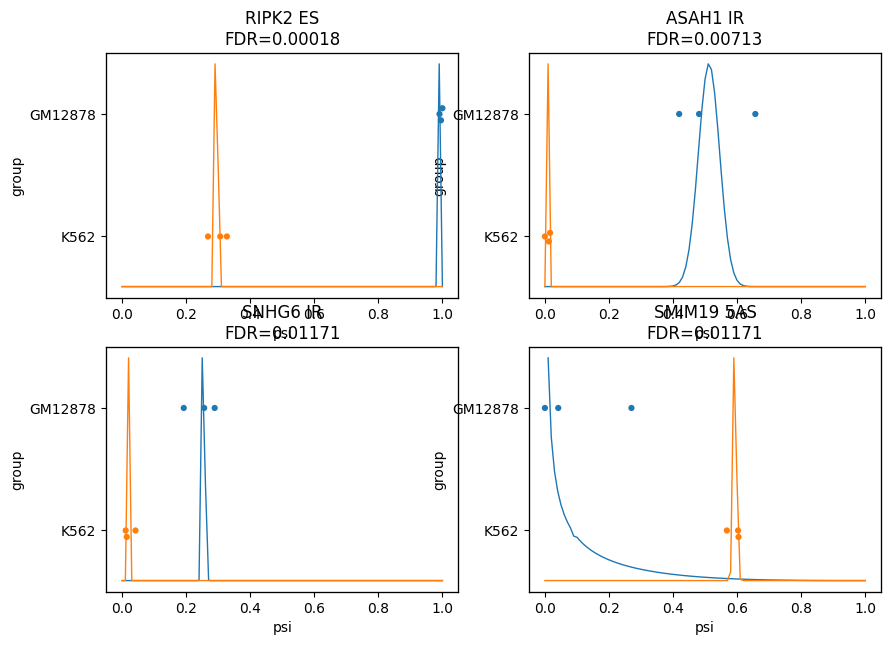

In [4]:
plt.rcParams["figure.figsize"] = (10,7)
from isotools.plots import plot_diff_results

f,axs,plotted=plot_diff_results(diff_splice, min_diff=.1, min_support=2,grid_shape=(2,2), group_colors=['C0','C1'])


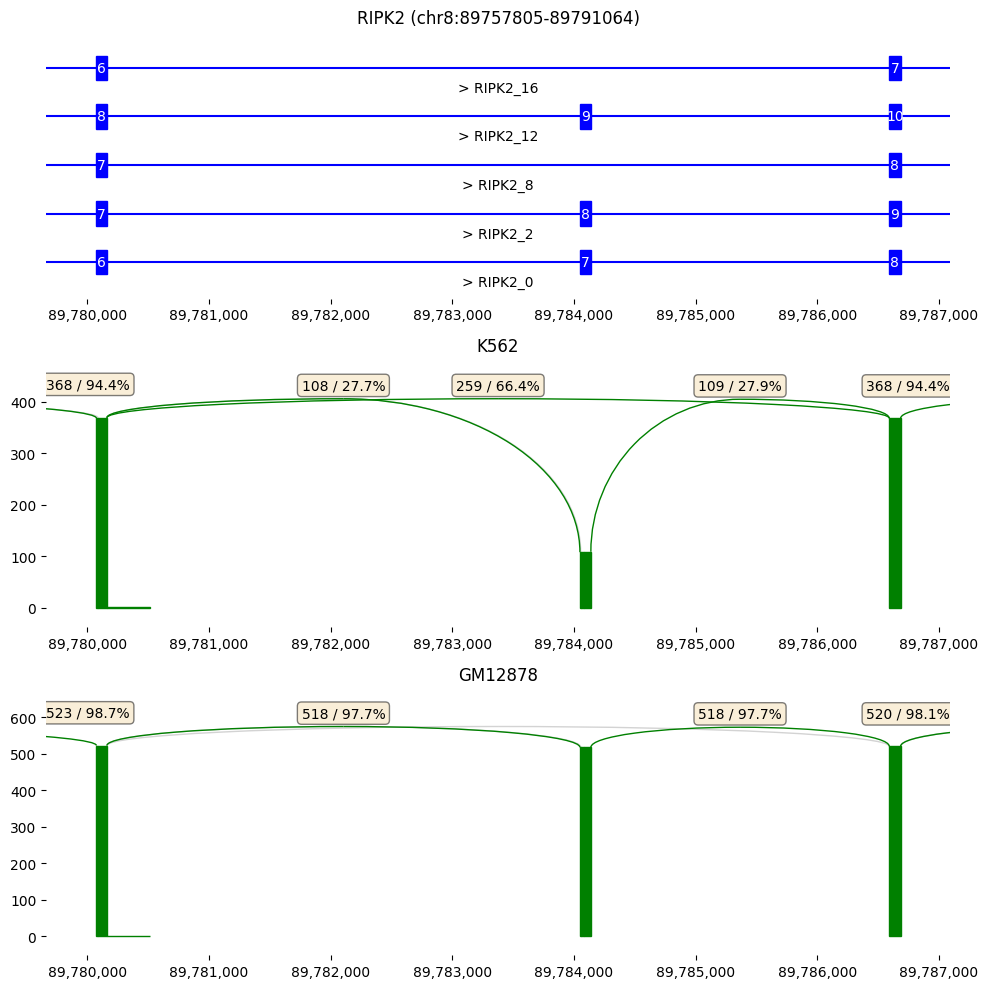

In [5]:
plt.rcParams["figure.figsize"] = (10,10)
pos=[89780160-500,89786592+500]
fig,axs=plt.subplots(3)
g=isoseq['RIPK2']
g.gene_track(x_range=pos, ax=axs[0], reference=False, select_transcripts=g.filter_transcripts('SUBSTANTIAL'))
g.sashimi_plot(samples=isoseq.groups()['K562'],x_range=pos, ax=axs[1], title='K562', log_y=False)
g.sashimi_plot(samples=isoseq.groups()['GM12878'],x_range=pos, ax=axs[2], title='GM12878', log_y=False)

fig.tight_layout()



## Splicing coordination
A particular strength of long read sequencing is the fact that distal splicing events on the same gene are covered by the same read, facilitating analysis of splicing coordination. Isotools implements a pairwise independence test for all pairs of Alternative Splicing Events (ASEs) of a gene.

In [6]:
coordination_results=isoseq.coordination_test().sort_values('padj')
coordination_results.head()

100%|██████████| 10803/10803 [00:03<00:00, 2798.91genes/s]


,gene_id,gene_name,strand,eventA_type,eventB_type,eventA_start,evemtA_end,eventB_start,eventB_end,pvalue,padj,stat,log2OR,dcPSI_AB,dcPSI_BA,priA_priB,priA_altB,altA_priB,altA_altB,priA_priB_trID,priA_altB_trID,altA_priB_trID,altA_altB_trID
52,ENSG00000147813.16,NAPRT,-,IR,IR,143575093,143575190,143574900,143574985,4.436456e-82,5.501206e-80,98.895238,6.627829,0.525552,0.637141,472,45,14,132,"[0, 5, 6, 7, 54, 62, 73, 17, 100, 24, 30, 46, ...","[25, 48, 129, 68, 128, 33, 133, 101, 135, 141,...","[41, 96, 110, 112, 115]","[21, 42, 1, 12, 31, 71, 44, 51, 63, 78, 92, 13..."
107,ENSG00000182325.11,FBXL6,-,IR,IR,144357786,144358031,144357121,144357438,1.074426e-74,6.661440e-73,1715.833333,10.744694,0.472927,0.469753,142,3,4,145,"[1, 21, 34, 7, 32, 36, 38, 72, 45, 81, 51, 85,...","[89, 87, 71]","[4, 40]","[2, 9, 19, 41, 14, 24, 44, 48, 56, 11, 54, 17,..."
55,ENSG00000167700.9,MFSD3,+,IR,IR,144510015,144510359,144510507,144510597,4.299909e-32,1.777296e-30,inf,38.459595,0.503866,0.743802,180,20,0,42,"[0, 3, 23, 35, 5, 38, 39]","[2, 21, 19, 20, 29]",[],"[11, 26, 14, 36, 18]"
45,ENSG00000160957.15,RECQL4,-,IR,IR,144512771,144512846,144512324,144512391,1.341822e-31,4.159649e-30,11.529161,3.527216,0.331031,0.344543,1231,87,81,66,"[22, 31, 6, 20, 114, 147, 124, 11, 38, 72, 13,...","[401, 191, 221, 94, 364, 68, 204, 127, 519, 17...","[117, 136, 279, 259, 271, 532, 292, 49, 184, 2...","[408, 110, 112, 28, 29, 158, 190, 215, 495, 51..."
108,ENSG00000182325.11,FBXL6,-,IR,IR,144357786,144358031,144356915,144356989,6.335233e-27,1.571138e-25,51.918519,5.698177,0.228402,0.451672,163,90,3,86,"[1, 12, 21, 34, 4, 7, 75, 86, 15, 23, 25, 26, ...","[2, 3, 41, 24, 44, 48, 8, 17, 37, 6, 18, 33, 5...","[32, 53]","[9, 19, 14, 56, 11, 13, 54, 42, 63, 64, 5, 16,..."


## Differential Isoform Expression
In addition to the differential splicing test, isotools also implements the differential isoform expression (DIE) test, as proposed by [Joglekar *et al.*, 2021](https://www.nature.com/articles/s41467-020-20343-5)


In [7]:
isoseq.die_test(groups=isoseq.groups()).sort_values('pvalue').head(10)

100%|██████████| 10803/10803 [00:00<00:00, 17452.81genes/s]


,gene_id,gene_name,chrom,strand,start,end,padj,pvalue,deltaPI,transcript_ids
5982,ENSG00000070756.17,PABPC1,chr8,-,100685815,100722809,0.000000e+00,0.000000e+00,-0.289084,"[2, 1]"
5094,ENSG00000156482.11,RPL30,chr8,-,98024850,98046469,0.000000e+00,0.000000e+00,0.515042,"[3, 2]"
4805,ENSG00000161016.18,RPL8,chr8,-,144789764,144792587,0.000000e+00,0.000000e+00,-0.477042,"[2, 6]"
4632,ENSG00000164924.18,YWHAZ,chr8,-,100916522,100953388,0.000000e+00,0.000000e+00,0.303116,"[31, 11]"
4172,ENSG00000147604.14,RPL7,chr8,-,73290241,73295789,1.157393e-170,1.885004e-172,0.092221,"[2, 31]"
3235,ENSG00000104408.11,EIF3E,chr8,-,108162786,108443496,2.092139e-137,4.088872e-139,0.166874,"[0, 20]"
9988,ENSG00000104312.8,RIPK2,chr8,+,89757805,89791064,6.088181e-101,1.388185e-102,0.677697,"[2, 0]"
4239,ENSG00000129696.13,TTI2,chr8,-,33473385,33513185,9.366700e-100,2.440834e-101,-0.617118,"[3, 22]"
1369,ENSG00000147684.10,NDUFB9,chr8,+,124539100,124580648,4.019587e-89,1.178381e-90,0.399575,"[0, -1]"
1525,ENSG00000104320.15,NBN,chr8,-,89924514,90003228,5.103980e-88,1.662534e-89,-0.409024,"[2, 1]"
